In [23]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import display 
import seaborn as sns
import visuals_pca as vs
import model_utils as utils

# Pretty display for notebooks
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

dataset, features, labels = utils.getDataSet("datasets/dataset.csv.gz")

,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,ALTO_COSTO,CIE_10,...,PQR_CLASE_SNS,PQR_ESTADO,PQR_TIPOATENCION,PQR_TIPOPETICION,TRIM,AFEC_LOCATION,ENT_LOCATION,PET_LOCATION,COMPLETE_MOTIVE,RIESGO_VIDA
0,0.834084,0.596096,0.527528,0.728729,0.856356,0.707708,1.000000,1.0,1.000000e-07,0.008509,...,1.0,0.63013,0.16967,0.804304,0.411912,0.552553,0.688689,0.779279,0.819319,0
1,0.861361,0.596096,1.000000,0.728729,0.856356,0.707708,1.000000,1.0,1.000000e-07,0.446947,...,1.0,0.63013,1.00000,0.804304,0.411912,0.468913,0.306227,0.458112,0.647147,0
2,0.843844,0.790791,1.000000,0.728729,0.918919,0.707708,0.574575,1.0,1.000000e-07,0.932719,...,1.0,0.63013,1.00000,0.804304,0.411912,0.865365,0.839840,0.890390,0.775776,0
3,0.843844,1.000000,1.000000,0.728729,0.911411,0.707708,0.574575,1.0,1.000000e-07,0.003074,...,1.0,0.63013,1.00000,0.804304,0.411912,0.979479,0.984985,0.974474,0.569570,0
4,0.843844,0.596096,1.000000,0.728729,0.911411,0.978478,0.574575,1.0,1.000000e-07,0.982983,...,1.0,1.00000,1.00000,0.804304,0.411912,0.825826,0.877377,0.668168,0.845846,1


In [ ]:
import matplotlib
matplotlib.__version__

In [29]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=2)
pca = pca.fit(features)

# TODO: Transform log_samples using the PCA fit above
reduced_data = pca.transform(features)

reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

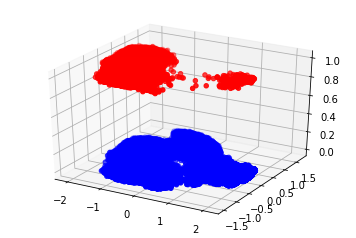

In [47]:
from mpl_toolkits.mplot3d import Axes3D

reduced_dataset = reduced_data
reduced_dataset['RIESGO_VIDA'] = labels

d1 = reduced_dataset.loc[reduced_dataset['RIESGO_VIDA'] == 1]
d2 = reduced_dataset.loc[reduced_dataset['RIESGO_VIDA'] == 0]


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# scatterplot of the reduced data
ax.scatter(d1['Dimension 1'], d1['Dimension 2'], d1['RIESGO_VIDA'], c='r')
ax.scatter(d2['Dimension 1'], d2['Dimension 2'], d2['RIESGO_VIDA'], c='b')

plt.show()